In [26]:
#comparacion de los métodos ccc y jp


import random
import math
from time import time
import numpy as np

import matplotlib.pyplot as plt  # para graficar los histogramas
%matplotlib inline 
#no se necesita numpy

def buffon(n,r,a,b):
    data=[]
    #print( 'Buffon Needle Experiment (Google it) ') 
    #print( 'Runs       Number Hits  estimate of pi')
    for jj in range(r):  
        nhits = 0
        for ii in range(n): 
            xcent = random.uniform(0,b/2.0)
            theta = random.uniform(0,math.pi/2)
            xtip  = xcent - (a/2.0)*math.cos(theta)  #use of cosine not historically accurate
            if xtip < 0 :
                nhits += 1
        #print str(jj)+'            '+str(nhits)+'               '+str((6.0/a*float(b))*nhits/n)
        c = 2.0*a*n
        d = b*nhits
        #print( str(jj)+'            '+str(nhits)+'               '+str(c/d))
        data.append([jj,nhits])
    return data
    


n=np.linspace(10**2,10**6,10,endpoint=True)

aux=[]

for i in n:
    t1=time()
    ccc=buffon(int(i),1,0.75,1) #prueba de la funcion
    t2=time()
    t3=t2-t1
    aux.append(t3)

aux=np.array(aux)
aux

array([0.        , 0.13964915, 0.28521824, 0.40006995, 0.54487658,
       0.64577055, 0.79297495, 0.94669533, 1.06322074, 1.24926448])

In [27]:
# modulos necesarios
import numpy as np     # para calculos matriciales
import matplotlib.pyplot as plt  # para graficar los histogramas
from time import time
%matplotlib inline              
# para incorporar los graficos al notebook

# funciones
# Inciso A: problema original de buffon
def buffon(N, l=0.75, b=1.0):
    
    t1=time()
    x_cent = np.random.uniform(0,b/2,N)       # centros aleatorios
    theta = np.random.uniform(0,np.pi/2, N)   # angulos aleatorios
    
    x_tip = x_cent - (l/2.0)*np.cos(theta)     # puntas de las agujas
    hits = x_tip < 0    # vector con las agujas que tocan las rayas

    n_hits = np.sum(hits) # acumulacion de los cruces
    
    c = 2.0*l*N        # formula de buffon
    d = b*n_hits
    pi_est = c / d
    t2=time()
    t3=t2-t1
    return pi_est, t3


a=np.linspace(10**2,10**6,10,endpoint=True,dtype=np.int32)
a

vbuffon=np.vectorize(buffon)
_,tiempo = vbuffon(a)

In [16]:
tiempo

array([0.        , 0.00597596, 0.00997472, 0.01397038, 0.0179193 ,
       0.02194142, 0.02892303, 0.03292823, 0.03892994, 0.04291725])

Text(0, 0.5, 'Tiempo en seg')

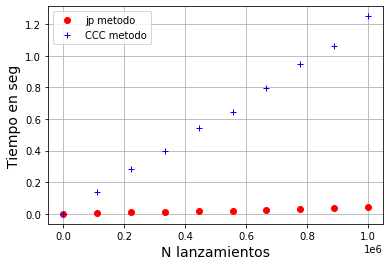

In [28]:
plt.figure()
plt.grid()
plt.plot(a,tiempo,'ro',label='jp metodo')
plt.plot(n,aux,'b+',label='CCC metodo')
plt.legend()
plt.xlabel('N lanzamientos', fontsize=14)
plt.ylabel('Tiempo en seg', fontsize=14)

In [29]:
from time import time
import numpy as np
import random
import matplotlib.pyplot as plt  # para graficar los histogramas
%matplotlib inline 
#no se necesita numpy
l=0.75
b=1.0

t1=time()
N=np.linspace(10**2,10**6,10,dtype=np.int32)

x_cent = np.random.uniform(0,b/2,N[-1])       # centros aleatorios
theta = np.random.uniform(0,np.pi/2,N[-1])   # angulos aleatorios
x_tip = x_cent - (l/2.0)*np.cos(theta)     # puntas de las agujas
hits = x_tip < 0    # vector con las agujas que tocan las rayas
n_hits=[]


[n_hits.append(np.random.permutation(hits[0:i]).sum()) for i in N];

c = 2.0*l*N        # formula de buffon
d = b*np.array(n_hits)
pi_est = c / d
t2=time()
t3=t2-t1
t3

0.1639723777770996

In [30]:
t3=t3/len(N)*np.ones(len(N))

In [31]:
t3.shape

(10,)

Text(0, 0.5, 'Tiempo en seg')

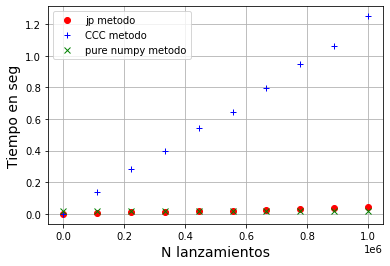

In [32]:
plt.figure()
plt.grid()
plt.plot(a,tiempo,'ro',label='jp metodo')
plt.plot(n,aux,'b+',label='CCC metodo')
plt.plot(N,t3,'gx',label='pure numpy metodo')
plt.legend()
plt.xlabel('N lanzamientos', fontsize=14)
plt.ylabel('Tiempo en seg', fontsize=14)

Text(0, 0.5, 'Tiempo en seg')

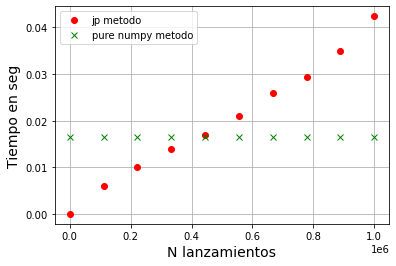

In [33]:
plt.figure()
plt.grid()
plt.plot(a,tiempo,'ro',label='jp metodo')
plt.plot(N,t3,'gx',label='pure numpy metodo')
plt.legend()
plt.xlabel('N lanzamientos', fontsize=14)
plt.ylabel('Tiempo en seg', fontsize=14)

In [34]:
# -*- coding: utf-8 -*-
"""
@author: LImber
"""

import numpy as np
from time import time
def kusillo(N, l=0.75, b=1.0):
    t1=time()
    D=np.random.rand(N)*b/2
    O=np.random.rand(N)*np.pi/2
    D1=D[D<l/2]
    O1=O[D<l/2]
    Oc=np.arcsin(2*D1/l)
    E=O1[O1>=Oc]
    P=len(E)/len(D)
    #print(f'estimado por monti: {P}')
    #PR=2*l/(np.pi*b)
    #print(f'valor real: {PR}')
    pi=2*l/(P*b)
    #print(f'el valor de pi es: {pi}')
    t2=time()
    t3=t2-t1
    return pi, t3

aw=np.linspace(10**2,10**6,10,endpoint=True,dtype=np.int32)
vkus=np.vectorize(kusillo)
_,tiempow = vkus(a)

Text(0, 0.5, 'Tiempo en seg')

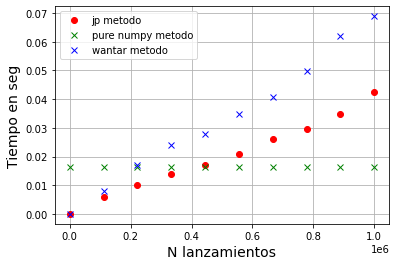

In [35]:
plt.figure()
plt.grid()
plt.plot(a,tiempo,'ro',label='jp metodo')
plt.plot(N,t3,'gx',label='pure numpy metodo')

plt.plot(aw,tiempow,'bx',label='wantar metodo')

plt.legend()
plt.xlabel('N lanzamientos', fontsize=14)
plt.ylabel('Tiempo en seg', fontsize=14)